In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD

print(tf.__version__)

2.0.0-rc0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

fatal: destination path 'dog-cat-full-dataset' already exists and is not an empty directory.


In [4]:
test_data_dir = 'dog-cat-full-dataset/data/test'
train_data_dir = 'dog-cat-full-dataset/data/train'

In [5]:
img_width = 32
img_height = 32
batch_size = 20

In [6]:
datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(img_width, img_height),
    classes=['dogs', 'cats'],
    class_mode='binary',
    batch_size=batch_size
)

Found 20000 images belonging to 2 classes.


In [8]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [61]:
validation_generator = datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(img_width, img_height),
    classes=['dogs', 'cats'],
    class_mode='binary',
    batch_size=batch_size
)

Found 5000 images belonging to 2 classes.


In [10]:
len(train_generator)

1000

In [62]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape = (img_width, img_height, 3)))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [63]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=len(train_generator), 
    epochs = 2, 
    validation_data=validation_generator, 
    validation_steps=len(validation_generator), 
    verbose = 1
)

Epoch 1/2
1000/1000 [==============================] - 76s 76ms/step - loss: 0.6970 - accuracy: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.5012
Epoch 2/2
1000/1000 [==============================] - 70s 70ms/step - loss: 0.6922 - accuracy: 0.5099 - val_loss: 0.6932 - val_accuracy: 0.4998


In [65]:
history.history

{'loss': [0.6969720588326455, 0.6922459817528724],
 'accuracy': [0.5021, 0.50995],
 'val_loss': [0.6932265484333038, 0.6931645517349243],
 'val_accuracy': [0.5012, 0.4998]}

In [66]:
def plot_learningCurve(history):
  # Plot training & validation accuracy values
  epoch_range = range(0, 2)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

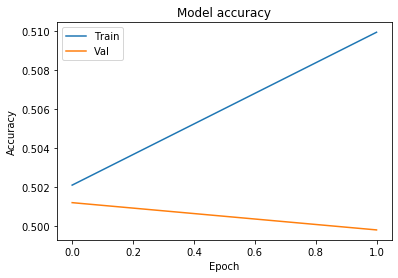

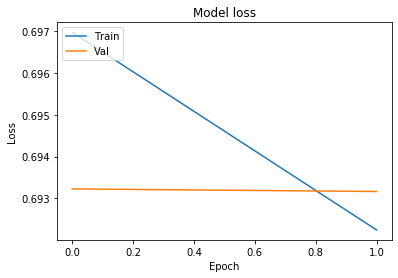

In [67]:
plot_learningCurve(history)

### Impliment First 3 Blocks of VGG16 Model¶

In [30]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape = (img_width, img_height, 3)))
model.add(MaxPool2D(2,2))

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(1, activation='sigmoid'))

In [31]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=len(train_generator), 
    epochs = 5, 
    validation_data=validation_generator, 
    validation_steps=len(validation_generator), 
    verbose = 1)

Epoch 1/5
1000/1000 [==============================] - 104s 104ms/step - loss: 7.6605 - accuracy: 0.4967 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 104s 104ms/step - loss: 7.6666 - accuracy: 0.5031 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 3/5
1000/1000 [==============================] - 105s 105ms/step - loss: 7.6666 - accuracy: 0.5003 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 108s 108ms/step - loss: 7.6666 - accuracy: 0.4968 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 100s 100ms/step - loss: 7.6666 - accuracy: 0.4934 - val_loss: 7.6666 - val_accuracy: 0.5000


In [41]:
history.history

{'loss': [7.660541598975659,
  7.6666194198131565,
  7.666619424700737,
  7.666619408726692,
  7.666619394659996],
 'accuracy': [0.4999, 0.5, 0.5, 0.5, 0.5],
 'val_loss': [7.666619403839111,
  7.666619403839111,
  7.666619403839111,
  7.666619403839111,
  7.666619403839111],
 'val_accuracy': [0.5, 0.5, 0.5, 0.5, 0.5]}

In [53]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

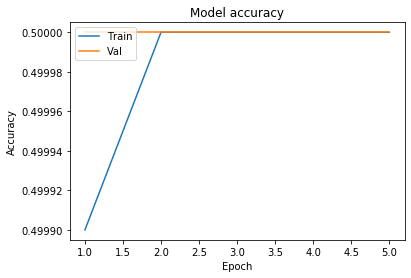

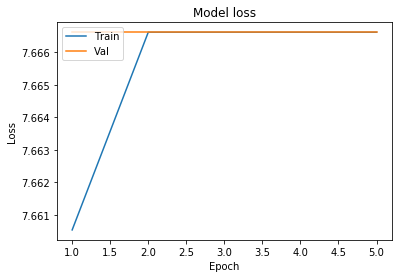

In [56]:
plot_learningCurve(history, 5)